In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
#os.chdir("/content/drive/MyDrive/Github/")
! pwd

/content


In [4]:

merged=pd.read_csv('/content/drive/My Drive/merged_DFS_v2.csv',index_col=0)
merged.shape

(132695, 275)

In [5]:
merged.head()

,season,gameid,date,playerid,player,position,team,oppteam,homeorroad,starter,...,salary_yahoo_last25_rollavg,salary_yahoo_last25_rollstd,salary_yahoo_last10_rollavg,salary_yahoo_last10_rollstd,salary_yahoo_last1,salary_yahoo_last2,salary_yahoo_last3,salary_yahoo_last4,salary_yahoo_last5,position1
0,NBA 2016-2017 Regular Season,21600009,2016-10-26,1713,Vince Carter,G-F,Memphis,Minnesota,H,N,...,10.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,G-F
1,NBA 2016-2017 Regular Season,21600028,2016-10-29,1713,Vince Carter,G-F,Memphis,New York,R,N,...,10.0,0.0,10.0,0.0,10.0,NaN,NaN,NaN,NaN,G-F
2,NBA 2016-2017 Regular Season,21600039,2016-10-30,1713,Vince Carter,G-F,Memphis,Washington,H,N,...,10.0,0.0,10.0,0.0,10.0,10.0,NaN,NaN,NaN,G-F
3,NBA 2016-2017 Regular Season,21600052,2016-11-01,1713,Vince Carter,G-F,Memphis,Minnesota,R,N,...,10.0,0.0,10.0,0.0,10.0,10.0,10.0,NaN,NaN,G-F
4,NBA 2016-2017 Regular Season,21600060,2016-11-02,1713,Vince Carter,G-F,Memphis,New Orleans,H,N,...,10.0,0.0,10.0,0.0,10.0,10.0,10.0,10.0,NaN,G-F


In [5]:
merged.isna().sum()

season                   0
gameid                   0
date                     0
playerid                 0
player                   0
                      ... 
salary_yahoo_last2    3577
salary_yahoo_last3    4451
salary_yahoo_last4    5305
salary_yahoo_last5    6146
position1              632
Length: 275, dtype: int64

In [6]:
merged.describe()

,gameid,playerid,mins,fgm,fga,threepm,threepa,ftm,fta,or,...,salary_yahoo_last3_rollstd,salary_yahoo_last25_rollavg,salary_yahoo_last25_rollstd,salary_yahoo_last10_rollavg,salary_yahoo_last10_rollstd,salary_yahoo_last1,salary_yahoo_last2,salary_yahoo_last3,salary_yahoo_last4,salary_yahoo_last5
count,1.326950e+05,1.326950e+05,132695.000000,132695.000000,132695.000000,132695.000000,132695.000000,132695.000000,132695.000000,132695.000000,...,1.305600e+05,132609.000000,131640.000000,132557.000000,1.315020e+05,130007.000000,129118.000000,128244.000000,127390.000000,126549.000000
mean,2.315196e+07,7.811686e+05,22.745204,3.788244,8.228290,1.058864,2.945017,1.643114,2.129621,0.941166,...,4.596906e-01,16.837145,1.439859,16.842361,9.522505e-01,16.880171,16.904989,16.928928,16.952590,16.975657
std,5.072445e+06,7.143828e+05,10.504827,3.124114,5.807646,1.400256,2.871921,2.303720,2.781307,1.331951,...,8.900304e-01,10.159850,1.471306,10.265674,1.152617e+00,10.375086,10.386951,10.398626,10.409911,10.421074
min,2.160000e+07,1.713000e+03,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,10.000000,0.000000,10.000000,0.000000e+00,10.000000,10.000000,10.000000,10.000000,10.000000
25%,2.170033e+07,2.023340e+05,15.300000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000e+00,10.000000,0.000003,10.000000,1.247710e-07,10.000000,10.000000,10.000000,10.000000,10.000000
50%,2.180066e+07,2.039010e+05,23.580000,3.000000,7.000000,1.000000,2.000000,1.000000,2.000000,0.000000,...,8.429370e-08,11.360000,1.159023,11.000000,6.749486e-01,11.000000,11.000000,11.000000,11.000000,11.000000
75%,2.190126e+07,1.627826e+06,31.120000,6.000000,12.000000,2.000000,5.000000,2.000000,3.000000,1.000000,...,5.773503e-01,20.160000,2.281812,20.200000,1.505545e+00,20.000000,20.000000,20.000000,20.000000,21.000000
max,5.200021e+07,1.630466e+06,64.970000,23.000000,44.000000,14.000000,24.000000,26.000000,29.000000,13.000000,...,2.771281e+01,64.360000,17.319738,65.100000,1.887650e+01,66.000000,66.000000,66.000000,66.000000,66.000000


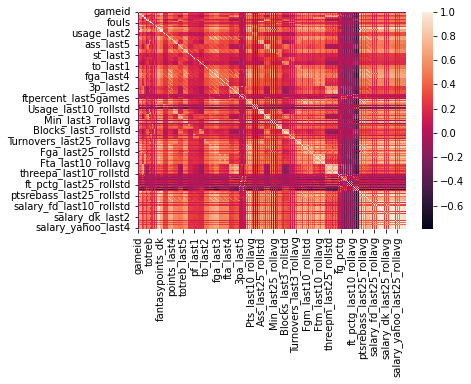

In [8]:
# too many variables

corrMatrix = merged.corr()
sn.heatmap(corrMatrix)
plt.show()

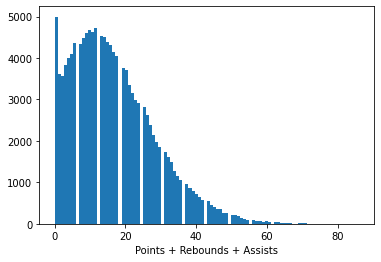

132695 16.679158973586045


In [9]:
# let's look at our 1st target variable

plt.hist(merged['ptsrebass'], bins= 100)
plt.xlabel('Points + Rebounds + Assists')
plt.show()
print(len(merged), merged['ptsrebass'].mean())

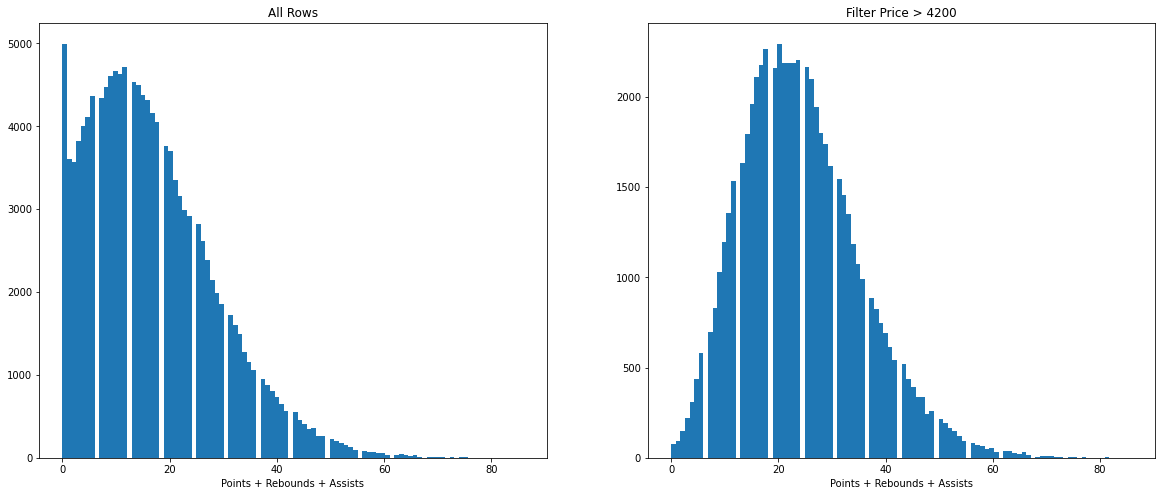

60977 24.21827902323827


In [5]:
# we are not interested in predicting smaller numbers as they are seldom options to bet on in marketplaces
# Here I found the player with the smallerest over/under prob bet listed, used their corresponding fantasy closing price to set the minimal threshold

minTarget = 4200    # The Nicholas Batum filter
minTargetsDF = merged[merged['salary_dk']> minTarget]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
plt.subplot(1, 2, 1)
plt.hist(merged['ptsrebass'], bins= 100)
plt.title('All Rows')
plt.xlabel('Points + Rebounds + Assists')

plt.subplot(1, 2, 2)
plt.hist(minTargetsDF['ptsrebass'], bins= 100)
plt.title(f'Filter Price > {minTarget}')
plt.xlabel('Points + Rebounds + Assists')

plt.show()
print(len(minTargetsDF), minTargetsDF['ptsrebass'].mean())

In [11]:
minTargetsDF.head(10)

,season,gameid,date,playerid,player,position,team,oppteam,homeorroad,starter,...,salary_yahoo_last25_rollavg,salary_yahoo_last25_rollstd,salary_yahoo_last10_rollavg,salary_yahoo_last10_rollstd,salary_yahoo_last1,salary_yahoo_last2,salary_yahoo_last3,salary_yahoo_last4,salary_yahoo_last5,position1
10,NBA 2016-2017 Regular Season,21600167,2016-11-16,1713,Vince Carter,G-F,Memphis,LA Clippers,R,N,...,10.000000,0.000000,10.000000,0.000000e+00,10.0,10.0,10.0,10.0,10.0,G-F
11,NBA 2016-2017 Regular Season,21600180,2016-11-18,1713,Vince Carter,G-F,Memphis,Dallas,R,N,...,10.000000,0.000000,10.000000,0.000000e+00,10.0,10.0,10.0,10.0,10.0,G-F
12,NBA 2016-2017 Regular Season,21600190,2016-11-19,1713,Vince Carter,G-F,Memphis,Minnesota,H,N,...,10.076923,0.277350,10.100000,3.162278e-01,10.0,10.0,10.0,10.0,10.0,G-F
119,NBA 2017-2018 Regular Season,21700911,2018-02-27,1713,Vince Carter,G-F,Sacramento,Portland,R,N,...,11.040000,4.188078,12.100000,6.640783e+00,10.0,10.0,10.0,10.0,10.0,G-F
273,NBA 2016-2017 Regular Season,21600005,2016-10-26,1717,Dirk Nowitzki,F,Dallas,Indiana,R,Y,...,28.000000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,F
274,NBA 2016-2017 Regular Season,21600062,2016-11-02,1717,Dirk Nowitzki,F,Dallas,Utah,R,Y,...,28.000000,0.000000,28.000000,6.529362e-07,28.0,NaN,NaN,NaN,NaN,F
275,NBA 2016-2017 Regular Season,21600076,2016-11-04,1717,Dirk Nowitzki,F,Dallas,Portland,H,Y,...,28.000000,0.000000,28.000000,4.616956e-07,28.0,28.0,NaN,NaN,NaN,F
276,NBA 2016-2017 Regular Season,21600220,2016-11-23,1717,Dirk Nowitzki,F,Dallas,LA Clippers,H,Y,...,28.000000,0.000000,28.000000,3.769729e-07,28.0,28.0,28.0,NaN,NaN,F
277,NBA 2016-2017 Regular Season,21600227,2016-11-25,1717,Dirk Nowitzki,F,Dallas,Cleveland,R,Y,...,28.000000,0.000000,28.000000,3.264681e-07,28.0,28.0,28.0,28.0,NaN,F
278,NBA 2016-2017 Regular Season,21600455,2016-12-23,1717,Dirk Nowitzki,F,Dallas,LA Clippers,R,Y,...,27.333333,1.632993,27.333333,1.632993e+00,28.0,28.0,28.0,28.0,28.0,F


In [6]:
# dropping lagging columns that are not rolling to minimize nas

for i in range(6):
  minTargetsDF = minTargetsDF.loc[:,~minTargetsDF.columns.str.endswith(f'last{i}')]
minTargetsDF = minTargetsDF.loc[:,~minTargetsDF.columns.str.endswith('lastgame')]
minTargetsDF = minTargetsDF.loc[:,~minTargetsDF.columns.str.endswith('last5games')]
minTargetsDF = minTargetsDF.loc[:,~minTargetsDF.columns.str.endswith('std')]
print(minTargetsDF.columns)
print(len(minTargetsDF.dropna()))

Index(['season', 'gameid', 'date', 'playerid', 'player', 'position', 'team',
       'oppteam', 'homeorroad', 'starter',
       ...
       'salary_fd_last3_rollavg', 'salary_fd_last25_rollavg',
       'salary_fd_last10_rollavg', 'salary_dk_last3_rollavg',
       'salary_dk_last25_rollavg', 'salary_dk_last10_rollavg',
       'salary_yahoo_last3_rollavg', 'salary_yahoo_last25_rollavg',
       'salary_yahoo_last10_rollavg', 'position1'],
      dtype='object', length=108)
37956


In [ ]:
# checking na counts by columns
for col in minTargetsDF.columns:
  print(col, minTargetsDF[f'{col}'].isna().sum())


In [ ]:
noPctDF = minTargetsDF.loc[:,~minTargetsDF.columns.str.contains('pct')]
for col in noPctDF.columns:
  print(col, minTargetsDF[f'{col}'].isna().sum())

In [8]:
print(noPctDF.dropna().shape)

(60627, 96)


In [9]:
# converting cateogrical data into numeric including home/away, whether they had 1 day rest
# dropping metrics from current game - would not be a very interesting model if we had the answers in our features
# dropping nas, many of which were created due to lagging metrics

noPctDF['HomeAwayBi'] = np.where(noPctDF['homeorroad'] == 'H', 1, 0)
df1 = noPctDF.iloc[:, 27::]
df1['daysrest'] = pd.to_numeric(df1['daysrest'].replace('3+', 3))
df1['0_daysrest'] = pd.Series(1*(df1['daysrest'] == False))
df1.drop(['position_dk', 'position_fd', 'position_yahoo', 'position1', 'fantasypoints_dk', 'fantasypoints_fd', 'fantasypoints_yahoo'], axis = 1, inplace = True)
df1.dropna(inplace = True)
print(df1.shape)
df1.head()


(60690, 64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,daysrest,salary_dk,salary_fd,salary_yahoo,Pts_last3_rollavg,Pts_last25_rollavg,Pts_last10_rollavg,Usage_last3_rollavg,Usage_last25_rollavg,Usage_last10_rollavg,...,salary_fd_last25_rollavg,salary_fd_last10_rollavg,salary_dk_last3_rollavg,salary_dk_last25_rollavg,salary_dk_last10_rollavg,salary_yahoo_last3_rollavg,salary_yahoo_last25_rollavg,salary_yahoo_last10_rollavg,HomeAwayBi,0_daysrest
10,1,4300.0,4400.0,10.0,16.333333,10.545455,11.3,16.425879,17.360570,15.787629,...,3954.545455,3960.0,4100.000000,3563.636364,3620.0,10.000000,10.000000,10.0,0,0
11,2,4500.0,4400.0,10.0,13.666667,10.416667,11.7,14.023652,16.983622,15.692885,...,3991.666667,4010.0,4266.666667,3641.666667,3770.0,10.000000,10.000000,10.0,0,0
12,1,4500.0,4400.0,11.0,8.333333,9.923077,10.3,16.293532,17.501513,15.652515,...,4023.076923,4060.0,4433.333333,3707.692308,3910.0,10.333333,10.076923,10.1,1,0
119,2,7200.0,7300.0,31.0,9.333333,6.800000,6.0,13.056276,15.607952,13.081214,...,4052.000000,4280.0,4666.666667,3672.000000,4030.0,17.000000,11.040000,12.1,0,0
273,3,5800.0,6700.0,28.0,22.000000,22.000000,22.0,21.360557,21.360557,21.360557,...,6700.000000,6700.0,5800.000000,5800.000000,5800.0,28.000000,28.000000,28.0,0,0


In [12]:
pd.set_option('display.max_columns', None)
df1.describe(include = 'all')

,daysrest,salary_dk,salary_fd,salary_yahoo,Pts_last3_rollavg,Pts_last25_rollavg,Pts_last10_rollavg,Usage_last3_rollavg,Usage_last25_rollavg,Usage_last10_rollavg,Ass_last3_rollavg,Ass_last25_rollavg,Ass_last10_rollavg,Totreb_last3_rollavg,Totreb_last25_rollavg,Totreb_last10_rollavg,Min_last3_rollavg,Min_last25_rollavg,Min_last10_rollavg,St_last3_rollavg,St_last25_rollavg,St_last10_rollavg,Blocks_last3_rollavg,Blocks_last25_rollavg,Blocks_last10_rollavg,Fouls_last3_rollavg,Fouls_last25_rollavg,Fouls_last10_rollavg,Turnovers_last3_rollavg,Turnovers_last25_rollavg,Turnovers_last10_rollavg,Fgm_last3_rollavg,Fgm_last25_rollavg,Fgm_last10_rollavg,Fga_last3_rollavg,Fga_last25_rollavg,Fga_last10_rollavg,Ftm_last3_rollavg,Ftm_last25_rollavg,Ftm_last10_rollavg,Fta_last3_rollavg,Fta_last25_rollavg,Fta_last10_rollavg,threepm_last3_rollavg,threepm_last25_rollavg,threepm_last10_rollavg,threepa_last3_rollavg,threepa_last25_rollavg,threepa_last10_rollavg,ptsrebass,ptsrebass_last3_rollavg,ptsrebass_last25_rollavg,ptsrebass_last10_rollavg,salary_fd_last3_rollavg,salary_fd_last25_rollavg,salary_fd_last10_rollavg,salary_dk_last3_rollavg,salary_dk_last25_rollavg,salary_dk_last10_rollavg,salary_yahoo_last3_rollavg,salary_yahoo_last25_rollavg,salary_yahoo_last10_rollavg,HomeAwayBi,0_daysrest
count,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.00000,6.069000e+04,6.069000e+04,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000,60690.000000
mean,1.813445,6286.419509,6433.553024,24.086644,15.365667,14.981727,15.26054,2.124101e+01,2.105894e+01,21.179295,3.360897,3.257969,3.324074,5.775757,5.644063,5.735873,29.926970,29.237950,29.693137,0.971289,0.953620,0.966638,0.617935,0.606621,0.615047,2.307330,2.274873,2.298632,1.859694,1.827486,1.847447,5.642615,5.502392,5.605489,12.036876,11.746533,11.943345,2.599802,2.552690,2.584771,3.322255,3.265020,3.303409,1.480634,1.424252,1.464791,4.035585,3.895470,3.989064,24.211616,24.502321,23.883759,24.320486,6417.135349,6297.275949,6362.849043,6256.047125,6099.863992,6181.400477,24.017107,23.627948,23.835401,0.502916,0.148641
std,6.745069,1694.230551,1853.532292,11.173113,6.647999,5.812817,5.88505,6.169057e+00,4.934701e+00,5.316425,2.420291,2.156278,2.218019,3.067653,2.682437,2.761791,5.452729,5.096303,4.920227,0.694152,0.430132,0.494081,0.691589,0.520981,0.563009,0.945633,0.613697,0.689234,1.124364,0.867899,0.919062,2.368295,2.000741,2.041103,4.566112,4.196158,4.209649,2.069528,1.688697,1.765037,2.469341,2.025969,2.113347,1.218769,0.977092,1.040330,2.747327,2.472123,2.552823,11.175582,8.843096,8.013890,7.988322,1849.879500,1876.128769,1862.553711,1706.007889,1770.498257,1743.365956,11.176861,11.223109,11.221567,0.499996,0.355737
min,0.000000,4300.000000,2000.000000,10.000000,0.000000,0.000000,0.00000,4.796163e-14,1.330491e-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.810000,7.480800,5.399000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,1.000000,1.000000,1966.666667,2391.666667,2170.000000,3000.000000,2852.173913,2530.000000,10.000000,10.000000,10.000000,0.000000,0.000000
25%,1.000000,

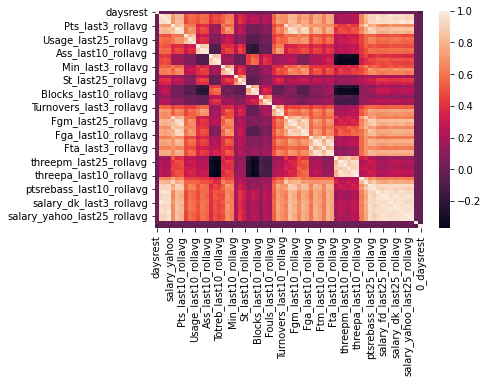

In [13]:
corrMatrix = df1.corr()
sn.heatmap(corrMatrix)
plt.show()

In [14]:
corrs = pd.DataFrame(corrMatrix['ptsrebass'])
corrs.sort_values(by='ptsrebass', ascending = False, inplace= True)
corrs.head(25)

#unsurprisingly correlations are high. A lot of inter-correlation across features
#


,ptsrebass
ptsrebass,1.000000
ptsrebass_last3_rollavg,0.811240
Pts_last3_rollavg,0.744159
Fgm_last3_rollavg,0.722039
ptsrebass_last10_rollavg,0.717151
ptsrebass_last25_rollavg,0.674489
Fga_last3_rollavg,0.664362
Pts_last10_rollavg,0.663677
Fgm_last10_rollavg,0.654052
salary_dk,0.646006


In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [10]:
#dfnoNa = df1.dropna()
Y = df1[['ptsrebass']]
X = df1.loc[:, df1.columns != 'ptsrebass']
# # X = array['ptsrebass']
# Y = array[:,8]
X.min()

daysrest                          0.0
salary_dk                      4300.0
salary_fd                      2000.0
salary_yahoo                     10.0
Pts_last3_rollavg                 0.0
                                ...  
salary_yahoo_last3_rollavg       10.0
salary_yahoo_last25_rollavg      10.0
salary_yahoo_last10_rollavg      10.0
HomeAwayBi                        0.0
0_daysrest                        0.0
Length: 63, dtype: float64

In [13]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X,Y)

In [11]:
# https://www.numpyninja.com/post/feature-selection-selection-of-the-best-that-matters

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae



In [12]:
# Data Splits

X_train, X_test, y_train, y_test = train_test_split(
X,Y, test_size=0.3,
 random_state=0)
#X_train = X_train.loc[:, X.columns != 'ptsrebass_last3_rollavg']
X2_train = StandardScaler().fit_transform(X_train)
X2_test = StandardScaler().fit_transform(X_test)


In [25]:
X_train.columns

Index(['daysrest', 'salary_dk', 'salary_fd', 'salary_yahoo',
       'Pts_last3_rollavg', 'Pts_last25_rollavg', 'Pts_last10_rollavg',
       'Usage_last3_rollavg', 'Usage_last25_rollavg', 'Usage_last10_rollavg',
       'Ass_last3_rollavg', 'Ass_last25_rollavg', 'Ass_last10_rollavg',
       'Totreb_last3_rollavg', 'Totreb_last25_rollavg',
       'Totreb_last10_rollavg', 'Min_last3_rollavg', 'Min_last25_rollavg',
       'Min_last10_rollavg', 'St_last3_rollavg', 'St_last25_rollavg',
       'St_last10_rollavg', 'Blocks_last3_rollavg', 'Blocks_last25_rollavg',
       'Blocks_last10_rollavg', 'Fouls_last3_rollavg', 'Fouls_last25_rollavg',
       'Fouls_last10_rollavg', 'Turnovers_last3_rollavg',
       'Turnovers_last25_rollavg', 'Turnovers_last10_rollavg',
       'Fgm_last3_rollavg', 'Fgm_last25_rollavg', 'Fgm_last10_rollavg',
       'Fga_last3_rollavg', 'Fga_last25_rollavg', 'Fga_last10_rollavg',
       'Ftm_last3_rollavg', 'Ftm_last25_rollavg', 'Ftm_last10_rollavg',
       'Fta_last3_rolla

In [13]:
# Decision Trees
# training error

dtr = DecisionTreeRegressor(random_state = 0)

dtr.fit(X2_train,y_train)
print(f'Decision Tree has {dtr.tree_.node_count} nodes with maximum depth {dtr.tree_.max_depth}')


Decision Tree has 64187 nodes with maximum depth 44


In [14]:
# training error

y_pred = dtr.predict(X2_train)

rmse_score = mse(y_train, y_pred, squared = False)
mape_score = mape(y_train, y_pred)
mae_score = mae(y_train,y_pred)
print(f'RMSE: {rmse_score}  MAPE: {mape_score}   MAE: {mae_score}')

y_pred
#y_train

RMSE: 0.0  MAPE: 0.0   MAE: 0.0


array([17., 40.,  4., ..., 18., 19., 24.])

In [15]:
y_pred_test = dtr.predict(X2_test)

rmse_score = mse(y_test, y_pred_test, squared = False)
mape_score = mape(y_test, y_pred_test)
mae_score = mae(y_test, y_pred_test)

print(f'RMSE: {rmse_score}  MAPE: {mape_score}   MAE: {mae_score}')

RMSE: 9.319656080274925  MAPE: 70248931409525.36   MAE: 7.3270170813423405


In [29]:
# import graphviz
# dot_data = tree.export_graphviz(dtr, feature_names=list(X), class_names= set(Y), filled=True)
# graphviz.Source(dot_data)

In [16]:
#

rf = RandomForestRegressor(random_state=0, n_estimators=1000)

rf.fit(X2_train, y_train)

y_pred = rf.predict(X2_train)

rmse_score = mse(y_train, y_pred, squared = False)
mape_score = mape(y_train, y_pred)
mae_score = mae(y_train, y_pred)
print(f'RMSE: {rmse_score}  MAPE: {mape_score}   MAE: {mae_score}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RMSE: 2.4261953041996582  MAPE: 25040705109819.086   MAE: 1.9069144834404348


In [ ]:
rf = RandomForestRegressor(random_state=0, n_estimators=100)

rf.fit(X2_train, y_train)

In [1]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

NameError: ignored

In [36]:
import timeit
start = timeit.timeit()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X2_train, y_train)

end = timeit.timeit()

print(end-start)

rf_random.best_params_

#OUTPUT

# {'bootstrap': False,
#  'max_depth': 10,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 4,
#  'min_samples_split': 2,
#  'n_estimators': 450}

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


-0.002114739000262489


{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 450}

In [43]:
# evaluating random search best fit for RF

best_random = rf_random.best_estimator_

y_pred_test = best_random.predict(X2_test)

rmse_score = mse(y_test, y_pred_test, squared = False)
mape_score = mape(y_test, y_pred_test)
mae_score = mae(y_test, y_pred_test)
print(f'RMSE: {rmse_score}  MAPE: {mape_score}   MAE: {mae_score}')

RMSE: 6.6031406289676315  MAPE: 72617768261805.17   MAE: 5.192172665240306


In [17]:
# Default params performed better than best from the 10 samples of params - based on search still might increase n_estimators, otherwise steer from hyperparameter tuning for now
y_pred_test = rf.predict(X2_test)

rmse_score = mse(y_test, y_pred_test, squared = False)
mape_score = mape(y_test, y_pred_test)
mae_score = mae(y_test, y_pred_test)
print(f'RMSE: {rmse_score}  MAPE: {mape_score}   MAE: {mae_score}')

RMSE: 6.52646692534745  MAPE: 65083408752394.586   MAE: 5.135981270939748


In [ ]:
importances = list(rf.feature_importances_)
feature_list = list(X.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

plt.barh(X_train.columns, rf.feature_importances_)

In [16]:
! pip install torch_utils

  Created wheel for torch-utils: filename=torch_utils-0.1.2-py3-none-any.whl size=6202 sha256=3ba793ff43437d89221a81b90b36292482ec650b6350e85de610e7e99c8357ef
  Stored in directory: /root/.cache/pip/wheels/5d/c0/1d/a539c1c2a4d41c5d7109899289cded24fe1320b6a6c7b02a4c
Successfully built torch-utils


In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import cuda
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, sampler
import torch.nn.functional as F
from torch_utils import AverageMeter
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from numpy import inf


from sklearn.model_selection import train_test_split
import os
from glob import glob
from torchvision import transforms
from torchvision import datasets
from torchvision import models
from torch import optim, cuda, Tensor
import tqdm

# Data science tools
import numpy as np

import os

# Image manipulations
from PIL import Image
from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
#plt.rcParams['font.size'] = 14

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [18]:
# Check whether there is a gpu for cuda
train_on_gpu = cuda.is_available()
print(f'Train on gpu: {train_on_gpu}')

# Number of gpus
if train_on_gpu:
    gpu_count = cuda.device_count()
    print(f'{gpu_count} gpus detected.')
    if gpu_count > 1:
        multi_gpu = True
    else:
        multi_gpu = False
else:
    multi_gpu = False
print(train_on_gpu,multi_gpu)

Train on gpu: True
1 gpus detected.
True False


In [19]:
# define model
class bmodel(nn.Module):
    def __init__(self, input_d, hidden_d, output_d):
        super().__init__()
        # Define all the layers that you need in your network
        # You can use nn.Linear() to define the linear layer
        self.linear1 = nn.Linear(input_d, hidden_d)
        self.linear2 = nn.Linear(hidden_d, output_d)
        self.dropout1 = nn.Dropout(.5)

        
        # You can use nn.Dropout() to define the dropout layer
        # You can use F.relu() to define your ReLu layer
        ######################
        ### YOUR CODE HERE ###
        ######################
        
        #####################
        ### YOUR CODE END ###
        #####################

    def forward(self, x):
        # Design your network structure here
        ######################
        ### YOUR CODE HERE ###
        ######################
        x1 = self.linear1(x)
        x2 = F.relu(x1)
        x3 = self.dropout1(x2)
        out = self.linear2(x3)
        return out

        #####################
        ### YOUR CODE END ###
        #####################


In [ ]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return bmodel(input_size, hidden_size, num_classes)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

toy_model = init_toy_model()
train_X, train_Y = init_toy_data()
validation_X, validation_Y = init_toy_data()



In [ ]:
# Datasets organization
batch_size = 1

# Transfer the data from numpy to tensor
data = {
    'train':
    TensorDataset(torch.from_numpy(X2_train).float(), torch.from_numpy(y_train).float()),
    'valid':
    # please define your validation dataset
    ######################
    ### YOUR CODE HERE ###
    ######################
    TensorDataset(torch.from_numpy(validation_X).float(), torch.from_numpy(validation_Y).float())
    #####################
    ### YOUR CODE END ###
    #####################

}


# Dataloader iterators, make sure to shuffle
dataloaders = {
    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=True,num_workers=10),
    'valid': DataLoader(data['valid'], batch_size=batch_size, shuffle=True,num_workers=10)
    # please define your validation data loader
    ######################
    ### YOUR CODE HERE ###
    ######################
    
    ######################
    ### YOUR CODE END ####
    ######################
}



# Iterate through the dataloader once
trainiter = iter(dataloaders['train'])
features, labels = next(trainiter)
features.shape, labels.shape
